In [6]:
import warnings
warnings.filterwarnings("ignore")

import sys
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

sys.path.append("../")
from data.dicts.col_dict import int_race_dict  # adjust if needed
from helpers.plots import *

data_dir = "../data/processed"
suffix = "ref_imp.csv"
cohorts = ["ukb", "nh", "nh3", "nh4"]

rows = []
for cohort in cohorts:
    df = pd.read_csv(f"{data_dir}/{cohort}_{suffix}", usecols=["race", "immigrant"]).dropna(subset=["race", "immigrant"])
    x = df["immigrant"].astype(int)

    for r_val in sorted(df["race"].unique()):
        y = (df["race"] == r_val).astype(int)
        r, p = pearsonr(x, y)
        race_label = int_race_dict.get(str(r_val), str(r_val))
        rows.append({
            "cohort": cohort,
            "race_raw": race_label,
            "race": str(race_label).upper(),
            "r_val": r_val,
            "r": r,
            "p": p,
            "n": len(df),
        })

res = pd.DataFrame(rows)


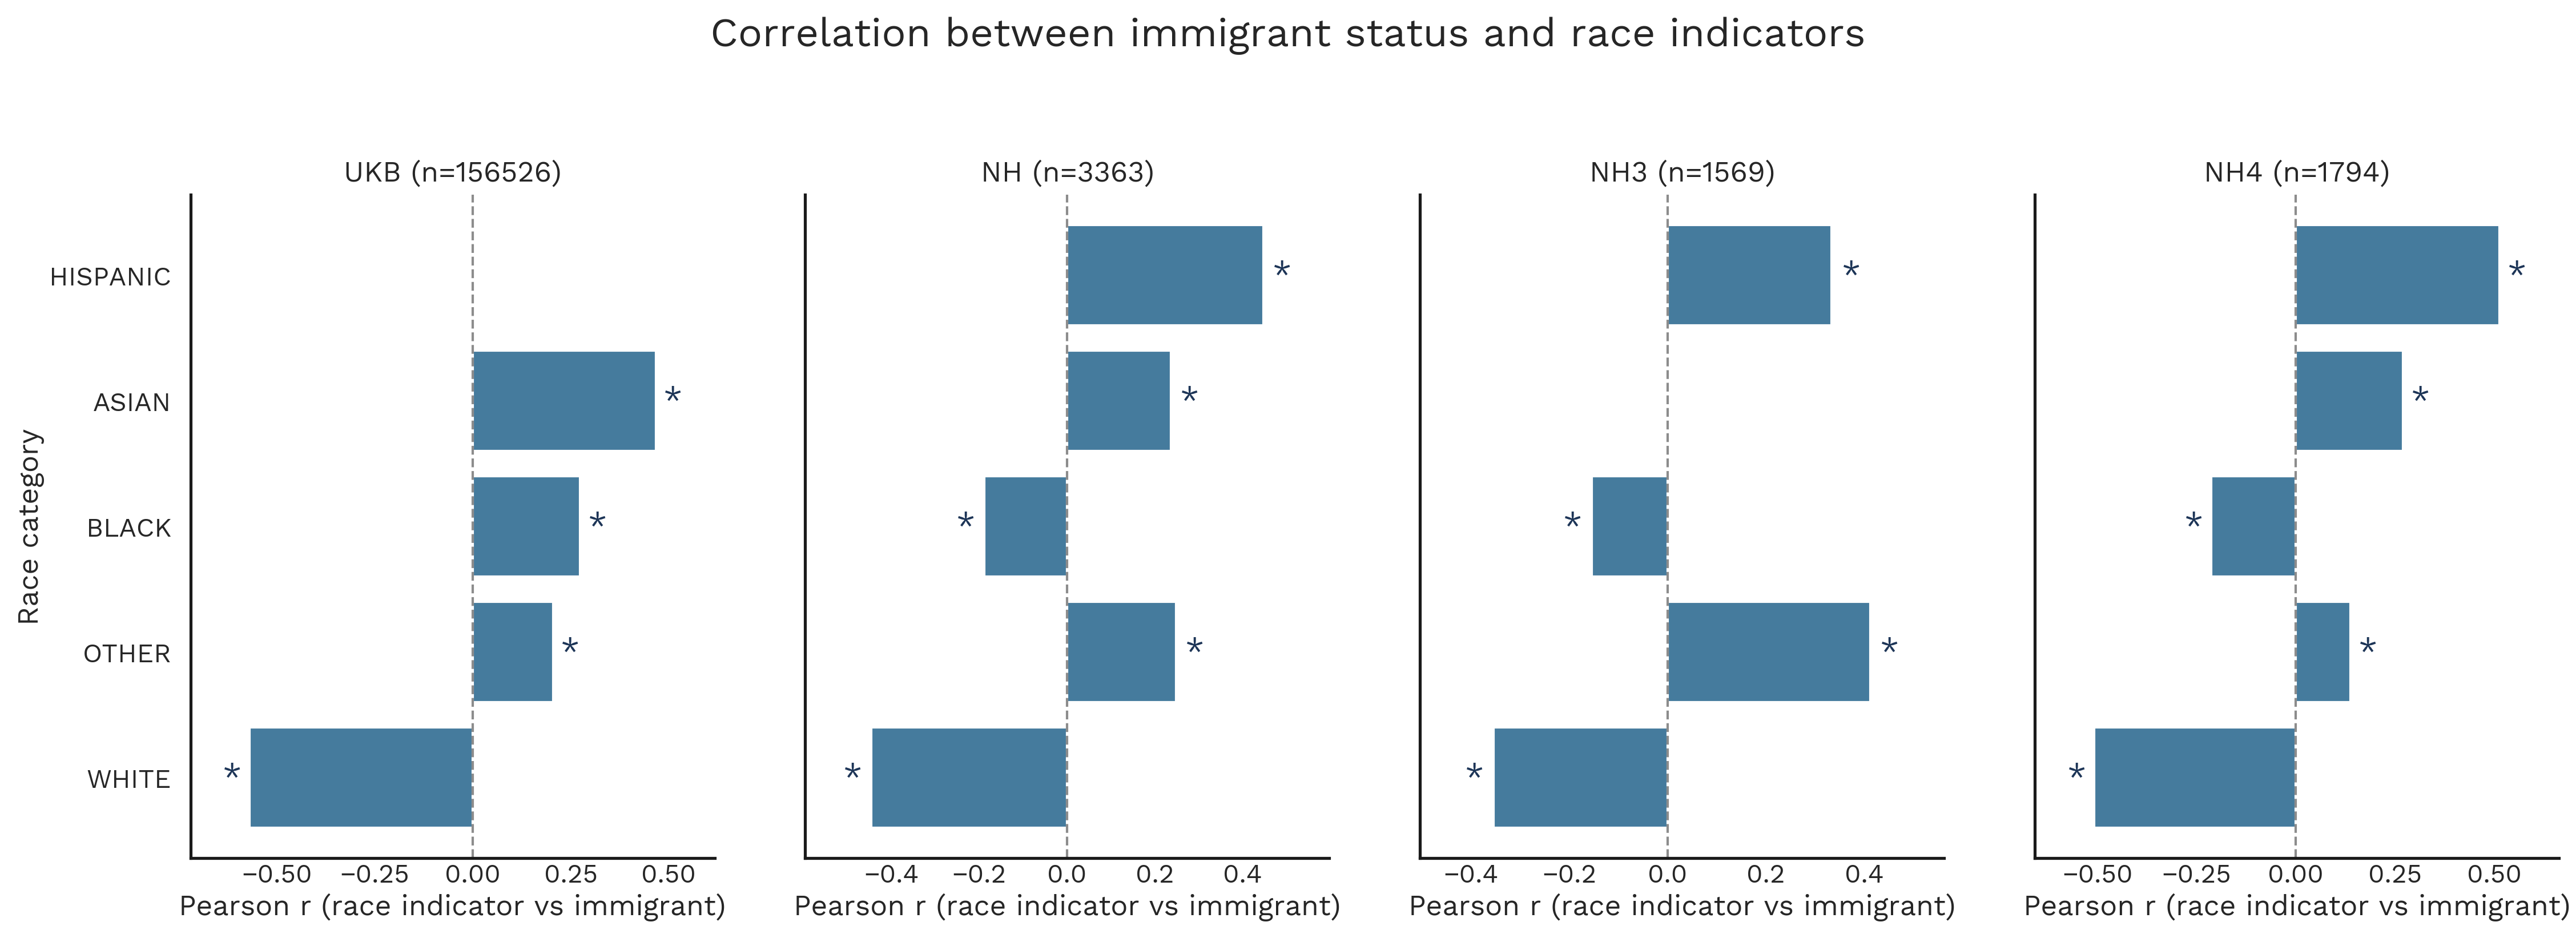

In [ ]:

fig, axes = plt.subplots(1, len(cohorts), figsize=(3.8*len(cohorts), 5.2), sharey=True)

# Make sure axes is always a 1D array for consistent indexing
if len(cohorts) == 1:
    axes = [axes]

for ax_idx, cohort in enumerate(cohorts):
    ax = axes[ax_idx]
    sub = res[res["cohort"] == cohort].sort_values("r")
    bars = ax.barh(sub["race"], sub["r"], color="#457b9d")
    ax.axvline(0, color="k", linewidth=1, linestyle="--", alpha=0.5)
    ax.set_xlabel("Pearson R")
    n_val = int(sub["n"].iloc[0])
    ax.set_title(f"{cohort_dict[cohort]} (n={n_val})")
    if ax_idx == 0:
        ax.set_ylabel("Race | Ethnicity")
    else:
        ax.set_ylabel("")
    for bar, rval, pval in zip(bars, sub["r"], sub["p"]):
        bar_tip = bar.get_width()
        ytick = bar.get_y() + bar.get_height() / 2
        offset = 0.02 if rval >= 0 else -0.02
        ha = "left" if rval >= 0 else "right"
        if pval < 0.05:
            ax.text(bar_tip + offset, ytick, "*", va="center", ha=ha, color="#1d3557", fontsize=14, fontweight='bold')
        else:
            ax.text(bar_tip + offset, ytick, f"$p$={pval:.2f}", va="center", ha=ha, color="#888888", fontsize=11, fontstyle="italic")

    ax.set_xlim(
        min(-0.25, sub["r"].min() - 0.15),
        max(0.25, sub["r"].max() + 0.15)
    )

plt.tight_layout(w_pad=2)
plt.suptitle("Correlation between immigrant status and race indicators", fontsize=17, y=1.05)
plt.subplots_adjust(top=0.85)
plt.show()
